# SKATR Plots

### Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

from matplotlib import gridspec, ticker

plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble']=(
    r'\usepackage{amsmath}'
    r'\usepackage[bitstream-charter]{mathdesign}'
)

PARAM_NAMES = [
    r'$m_{WDM}$', r'$\Omega_m$', r'$E_0$', r'$\log_{10}L_X$', r'$\log_{10}T_{vir}$', r'$\zeta$'
]

## Parameter regression

In [2]:
import os
from omegaconf import OmegaConf, open_dict
def get_prev_config(prev_exp_dir):
    return OmegaConf.load(os.path.join(prev_exp_dir, '.hydra/config.yaml'))

In [3]:
#dir = '/remote/gpu00/nordmann/skatr/runs/regression_micro_ViT/2024-07-15_15-30-11'
#get_prev_config(dir).data.splits.train

In [46]:
def data_eff(dirs1, dirs2, name1, name2, data_size=5012):
    metrics1 = []
    metrics2 = []
    for dir1, dir2 in zip(dirs1, dirs2):
        lp_pairs1 = np.load(os.path.join(dir1, 'label_pred_pairs.npy'))
        lp_pairs2 = np.load(os.path.join(dir2, 'label_pred_pairs.npy'))

        mares1s = []
        mares2s = []
        for i in range(2):
            for j in range(3):
                labels1, preds1 = lp_pairs1[:, 3*i + j].T
                labels2, preds2 = lp_pairs2[:, 3*i + j].T

                mares1 = abs(preds1-labels1)/labels1
                mares2 = abs(preds2-labels2)/labels2
                
                mares1s.append(np.mean(mares1))
                mares2s.append(np.mean(mares2))
            
        metric1 = np.mean(np.array(mares1s))
        metric2 = np.mean(np.array(mares2s))

        metrics1.append(metric1)
        metrics2.append(metric2)

    # Data
    data_frac = [get_prev_config(dir).data.splits.train for dir in dirs1]
    data_sizes = np.array(data_frac)
    data_sizes *= data_size
    
    # Plotting the data
    fig = plt.figure(figsize=(6,6), constrained_layout=True)
    #plt.figure(figsize=(6, 6))
    plt.plot(data_sizes, metrics1, marker='o', linestyle='-', color='b', label='Scratch')
    plt.plot(data_sizes, metrics2, marker='o', linestyle='-', color='r', label='Foundation')
    plt.xlim(0, plt.xlim()[1])
    plt.ylim(0, plt.ylim()[1])
    #plt.title('Data Efficiency')
    plt.xlabel('\# Final training lightcones')
    plt.ylabel('Absolute Error')
    plt.grid(True)
    plt.legend()
    plt.gcf().set_dpi(1000)
    plt.show()
    return fig

<>:40: SyntaxWarning: invalid escape sequence '\#'
<>:40: SyntaxWarning: invalid escape sequence '\#'
/tmp/ipykernel_2043869/3030553381.py:40: SyntaxWarning: invalid escape sequence '\#'
  plt.xlabel('\# Final training lightcones')


In [47]:
from datetime import datetime
def sort_files(file_paths, mode='date'):
    if mode == 'date':
        # Extract date and time, convert to datetime object, and pair with file path
        file_dates = [(datetime.strptime(path.split('/')[-1], '%Y-%m-%d_%H-%M-%S'), path) for path in file_paths]
        # Sort by datetime object
        file_dates.sort()
        # Extract sorted file paths
        sorted_file_paths = [path for _, path in file_dates]
    elif mode == 'number':
        # Extract the number, convert to integer, and pair with file path
        file_numbers = [(int(path.split('/')[-1]), path) for path in file_paths]
        # Sort by the number
        file_numbers.sort()
        # Extract sorted file paths
        sorted_file_paths = [path for _, path in file_numbers]
    else:
        raise ValueError("Mode must be either 'date' or 'number'")
    
    return sorted_file_paths

from glob import glob
master_dir = '/remote/gpu00/nordmann/skatr/runs/data_eff_micro_new'
dirs_scratch = sort_files(glob(f'{master_dir}/scratch/*'))
dirs_foundation = sort_files(glob(f'{master_dir}/foundation/*'))
fig = data_eff(
    dirs1=dirs_scratch,
    dirs2=dirs_foundation,
    name1='Scratch',
    name2='Downstream'
)
fig.savefig('/remote/gpu00/nordmann/skatr/plots/data_efficiency_opt_data_old_x5.pdf', bbox_inches='tight')
plt.show()

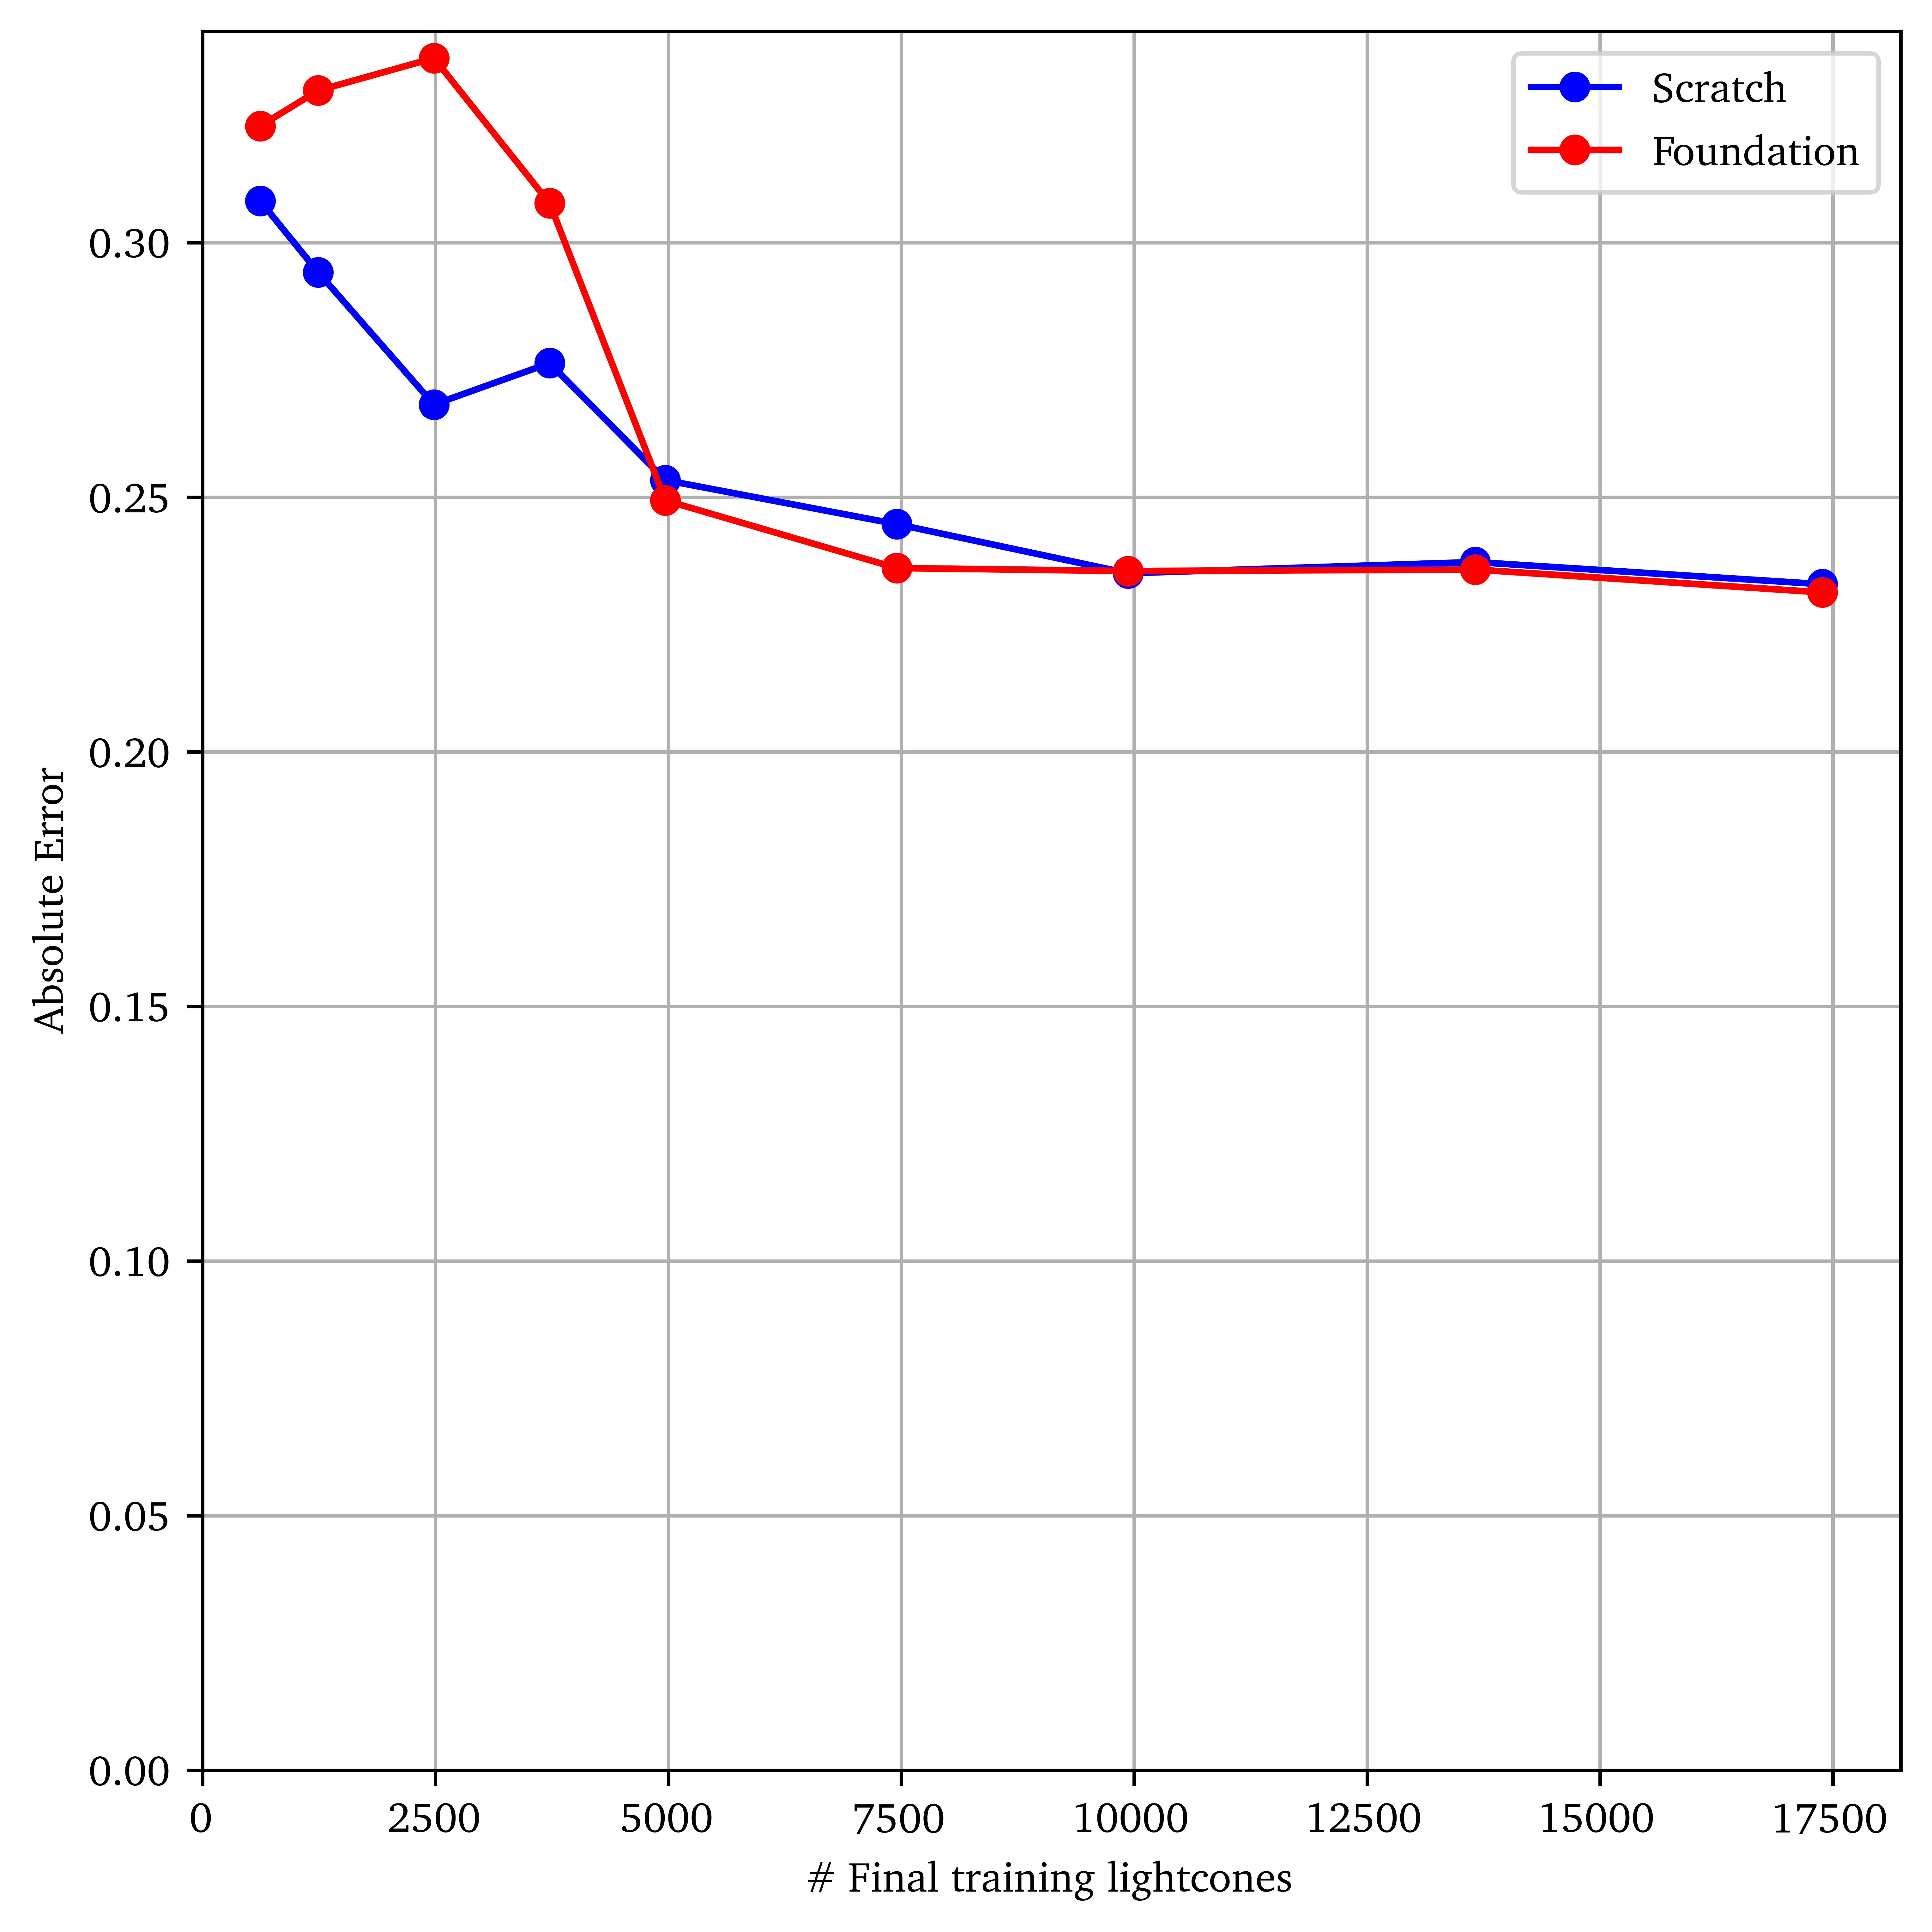

In [51]:
dataset = 'new'
version = 'v1'
from glob import glob
master_dir = f'/remote/gpu00/nordmann/skatr/runs/data_eff_micro_{dataset}_{version}'
dirs_scratch = sort_files(glob(f'{master_dir}/scratch/[!multirun]*'), mode='number')
dirs_foundation = sort_files(glob(f'{master_dir}/foundation/[!multirun]*'), mode='number')
data_size = 24841 if 'new' in dataset else 5012
fig = data_eff(
    dirs1=dirs_scratch,
    dirs2=dirs_foundation,
    name1='Scratch',
    name2='Foundation',
    data_size=data_size
)
fig.savefig(f'/remote/gpu00/nordmann/skatr/plots/data_efficiency_{dataset}_data_x5_{version}.pdf', bbox_inches='tight')
plt.show()

In [7]:
'''def data_eff_label(dirs1, dirs2, name1, name2):
    metrics1 = []
    metrics2 = []
    for dir1, dir2 in zip(dirs1, dirs2):
        lp_pairs1 = np.load(os.path.join(dir1, 'label_pred_pairs.npy'))
        lp_pairs2 = np.load(os.path.join(dir2, 'label_pred_pairs.npy'))

        mares1s = []
        mares2s = []
        for i in range(2):
            for j in range(3):
                labels1, preds1 = lp_pairs1[:, 3*i + j].T
                labels2, preds2 = lp_pairs2[:, 3*i + j].T

                mares1 = abs(preds1-labels1)/labels1
                mares2 = abs(preds2-labels2)/labels2
                
                mares1s.append(np.mean(mares1))
                mares2s.append(np.mean(mares2))
            
        metric1 = np.mean(np.array(mares1s))
        metric2 = np.mean(np.array(mares2s))

        metrics1.append(metric1)
        metrics2.append(metric2)

    # Data
    data_size = 5012
    data_frac = [get_prev_config(dir).data.splits.train for dir in dirs1]
    data_sizes = np.array(data_frac)
    data_sizes *= data_size
    
    # Plotting the data
    #fig = plt.figure(figsize=(6,6), constrained_layout=True)
    fig, ax = plt.subplots(2, 3, figsize=(2, 2), dpi=150)
    #plt.figure(figsize=(6, 6))
    plt.plot(data_sizes, metrics1, marker='o', linestyle='-', color='b', label='Scratch')
    plt.plot(data_sizes, metrics2, marker='o', linestyle='-', color='r', label='Foundation')
    plt.xlim(0, plt.xlim()[1])
    plt.ylim(0, plt.ylim()[1])
    #plt.title('Data Efficiency')
    plt.xlabel('Train set lightcones')
    plt.ylabel('Absolute Error')
    plt.grid(True)
    plt.legend()
    plt.gcf().set_dpi(1000)
    plt.show()
    return fig'''

"def data_eff_label(dirs1, dirs2, name1, name2):\n    metrics1 = []\n    metrics2 = []\n    for dir1, dir2 in zip(dirs1, dirs2):\n        lp_pairs1 = np.load(os.path.join(dir1, 'label_pred_pairs.npy'))\n        lp_pairs2 = np.load(os.path.join(dir2, 'label_pred_pairs.npy'))\n\n        mares1s = []\n        mares2s = []\n        for i in range(2):\n            for j in range(3):\n                labels1, preds1 = lp_pairs1[:, 3*i + j].T\n                labels2, preds2 = lp_pairs2[:, 3*i + j].T\n\n                mares1 = abs(preds1-labels1)/labels1\n                mares2 = abs(preds2-labels2)/labels2\n                \n                mares1s.append(np.mean(mares1))\n                mares2s.append(np.mean(mares2))\n            \n        metric1 = np.mean(np.array(mares1s))\n        metric2 = np.mean(np.array(mares2s))\n\n        metrics1.append(metric1)\n        metrics2.append(metric2)\n\n    # Data\n    total_data_size = 5012\n    data_frac = [get_prev_config(dir).data.splits.train 

In [10]:
def data_eff_label(dirs1, dirs2, name1, name2):
    # Store all mares1s and mares2s
    all_mares1s = []
    all_mares2s = []
    
    for dir1, dir2 in zip(dirs1, dirs2):
        lp_pairs1 = np.load(os.path.join(dir1, 'label_pred_pairs.npy'))
        lp_pairs2 = np.load(os.path.join(dir2, 'label_pred_pairs.npy'))

        mares1s = []
        mares2s = []
        for i in range(2):
            for j in range(3):
                labels1, preds1 = lp_pairs1[:, 3*i + j].T
                labels2, preds2 = lp_pairs2[:, 3*i + j].T

                mares1 = abs(preds1 - labels1) / labels1
                mares2 = abs(preds2 - labels2) / labels2
                
                mares1s.append(np.mean(mares1))
                mares2s.append(np.mean(mares2))
        
        all_mares1s.append(mares1s)
        all_mares2s.append(mares2s)

    # Convert to numpy arrays for easy handling
    all_mares1s = np.array(all_mares1s)
    all_mares2s = np.array(all_mares2s)
    
    # Plotting the data
    data_size = 5012
    data_frac = [get_prev_config(dir).data.splits.train for dir in dirs1]
    data_sizes = np.array(data_frac)
    data_sizes *= data_size
    fig, axs = plt.subplots(2, 3, figsize=(15, 15))
    
    for i in range(2):
        for j in range(3):
            idx = 3*i + j
            parameter = PARAM_NAMES[idx]
            ax = axs[i, j]
            ax.plot(data_sizes, all_mares1s[:, idx], marker='o', linestyle='-', color='b', label=name1)
            ax.plot(data_sizes, all_mares2s[:, idx], marker='o', linestyle='-', color='r', label=name2)
            ax.set_xlim(0, data_sizes[0])
            #ax.set_ylim(0, 1)
            ax.set_xlabel('\# Final Training Lightcones')
            ax.set_ylabel('Absolute Error')
            ax.grid(True)
            #ax.legend()
            ax.set_title(f'{parameter}')
            #ax.text(0.05, 0.9, param, transform=axs[i, i].transAxes, fontsize=14)
    
    plt.tight_layout()
    plt.show()
    return fig


<>:46: SyntaxWarning: invalid escape sequence '\#'
<>:46: SyntaxWarning: invalid escape sequence '\#'
/tmp/ipykernel_3192593/1214139817.py:46: SyntaxWarning: invalid escape sequence '\#'
  ax.set_xlabel('\# Final Training Lightcones')


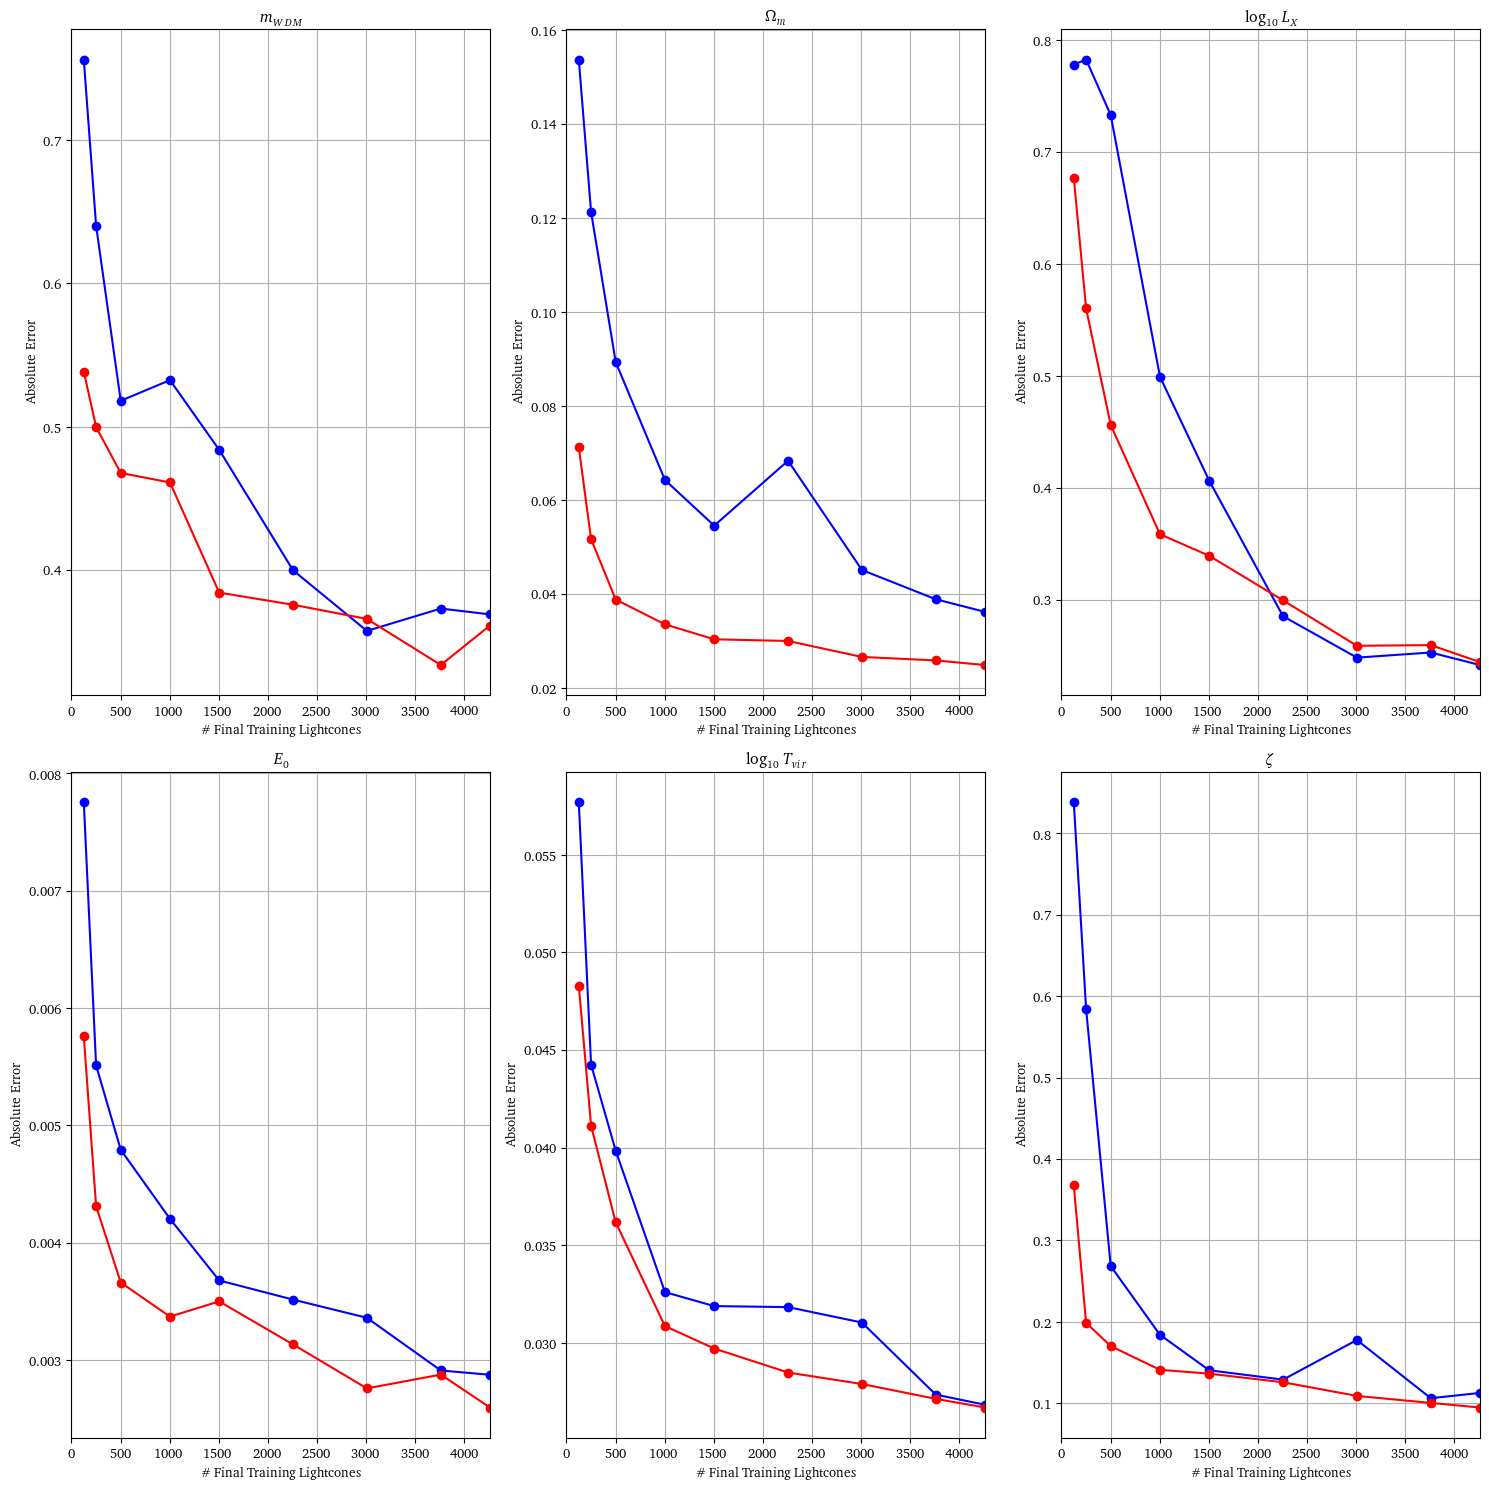

In [11]:
from glob import glob
master_dir = '/remote/gpu00/nordmann/skatr/runs/data_eff_micro_old_opt'
dirs_scratch = sort_files(glob(f'{master_dir}/scratch/*'))
dirs_foundation = sort_files(glob(f'{master_dir}/foundation/*'))
PARAM_NAMES = [r'$m_{WDM}$', r'$\Omega_m$', r'$\log_{10}L_X$', r'$E_0$', r'$\log_{10}T_{vir}$', r'$\zeta$']
fig = data_eff_label(
    dirs1=dirs_scratch,
    dirs2=dirs_foundation,
    name1='Scratch',
    name2='Foundation'
)
fig.savefig('/remote/gpu00/nordmann/skatr/plots/data_efficiency_opt_data_old_x5_params.pdf', bbox_inches='tight')
plt.show()

In [8]:
def compare_models(dir1, dir2, name1, name2):
    lp_pairs1 = np.load(os.path.join(dir1, 'label_pred_pairs.npy'))
    lp_pairs2 = np.load(os.path.join(dir2, 'label_pred_pairs.npy'))
    
    ref_kwargs = {'color': '#171717', 'ls': '-', 'lw': 0.5, 'alpha': 0.8}
    err_kwargs = {'ms': 2, 'elinewidth': 1}#, 'capsize': 1.5}
    
    colors1 = {'color': 'navy', 'ecolor': 'cornflowerblue', 'fmt': 'o'}
    colors2 = {'color': 'firebrick', 'ecolor': 'palevioletred', 'fmt': '^'}
    
    
    fig, ax = plt.subplots(2, 3, figsize=(11, 8), dpi=150)
    for i in range(2):
        for j in range(3):
    
            # fig = plt.figure(figsize=(3.3,3.5), constrained_layout=True)
            grid = gridspec.GridSpecFromSubplotSpec(2,1, subplot_spec=ax[i,j], height_ratios=[5,1.5], hspace=0.05)
            main_ax = plt.subplot(grid[0])
            ratio_ax = plt.subplot(grid[1])
            ax[i,j].set_axis_off()
        
            labels1, preds1 = lp_pairs1[:, 3*i + j].T
            labels2, preds2 = lp_pairs2[:, 3*i + j].T
        
            lo, hi = min(labels1.min(), labels2.min()), max(labels1.max(), labels2.max()) # range of true targets
            mares1 = abs(preds1-labels1)/labels1
            mares2 = abs(preds2-labels2)/labels2
        
            pad = 0.04*(hi-lo)
            main_ax.plot([lo-pad, hi+pad], [lo-pad, hi+pad], **ref_kwargs)
        
            num_bins = 25
            bins = np.linspace(lo, hi, num_bins+1)
            bin_width = bins[1]-bins[0]
            offset = bin_width / 8
            bin_centers = (bins[1:]+bins[:-1])/2
            bin_idcs1 = np.digitize(labels1, bins)
            bin_idcs2 = np.digitize(labels2, bins)
            
            partitions1 = [preds1[bin_idcs1==k+1] for k in range(num_bins)]
            partitions2 = [preds2[bin_idcs2==k+1] for k in range(num_bins)]
            main_ax.errorbar(bin_centers-offset, list(map(np.mean, partitions1)), yerr=list(map(np.std, partitions1)), label=name1, **err_kwargs, **colors1)
            main_ax.errorbar(bin_centers+offset, list(map(np.mean, partitions2)), yerr=list(map(np.std, partitions2)), label=name2, **err_kwargs, **colors2)
        
            ratio_ax.axhline(y=mares1.mean(), color=colors1['color'], ls='--', lw=1, alpha=0.6)
            ratio_ax.axhline(y=mares2.mean(), color=colors2['color'], ls='--', lw=1, alpha=0.6)
            mare_partitions1 = [mares1[bin_idcs1==k+1] for k in range(num_bins)]
            mare_partitions2 = [mares2[bin_idcs2==k+1] for k in range(num_bins)]
            ratio_ax.errorbar(bin_centers-offset, list(map(np.mean, mare_partitions1)), yerr=list(map(np.std, mare_partitions1)), **err_kwargs, **colors1)
            ratio_ax.errorbar(bin_centers+offset, list(map(np.mean, mare_partitions2)), yerr=list(map(np.std, mare_partitions2)), **err_kwargs, **colors2)
        
        
            main_ax.set_xlim([lo-pad, hi+pad])
            main_ax.set_ylim([lo-pad, hi+pad])
            ratio_ax.set_xlim(*main_ax.get_xlim())
            # ratio_ax.semilogy() # log scale
            mare_mean = (mares1.mean() + mares2.mean())/2
            # ratio_ax.set_ylim(mare_mean/10**1.25, mare_mean*10**1.25) # log scale
            ratio_ax.set_ylim(0, 3*mare_mean) # linear scale
        
            # main_ax.set_title(, fontsize=14)
            main_ax.text(0.05, 0.9, PARAM_NAMES[3*i + j], transform=main_ax.transAxes, fontsize=14)
            if j==0:
                main_ax.set_ylabel('Network', fontsize=13)
                ratio_ax.set_ylabel(r'$\left|\frac{\text{Net}\,-\,\text{True}}{\text{True}}\right|$', fontsize=10)
            if i==1:
                ratio_ax.set_xlabel('Truth', fontsize=13)

            ratio_ax.yaxis.set_major_locator(ticker.MaxNLocator(3))
            
            main_ax.set_xticklabels([])
            
    fig.subplots_adjust(hspace=0.15)#, wspace=0.35)
    fig.legend(*main_ax.get_legend_handles_labels(), frameon=False, bbox_to_anchor=(0.91, 0.935), fontsize=13, ncol=2, columnspacing=1.)
    return fig

#### CNN vs ViT

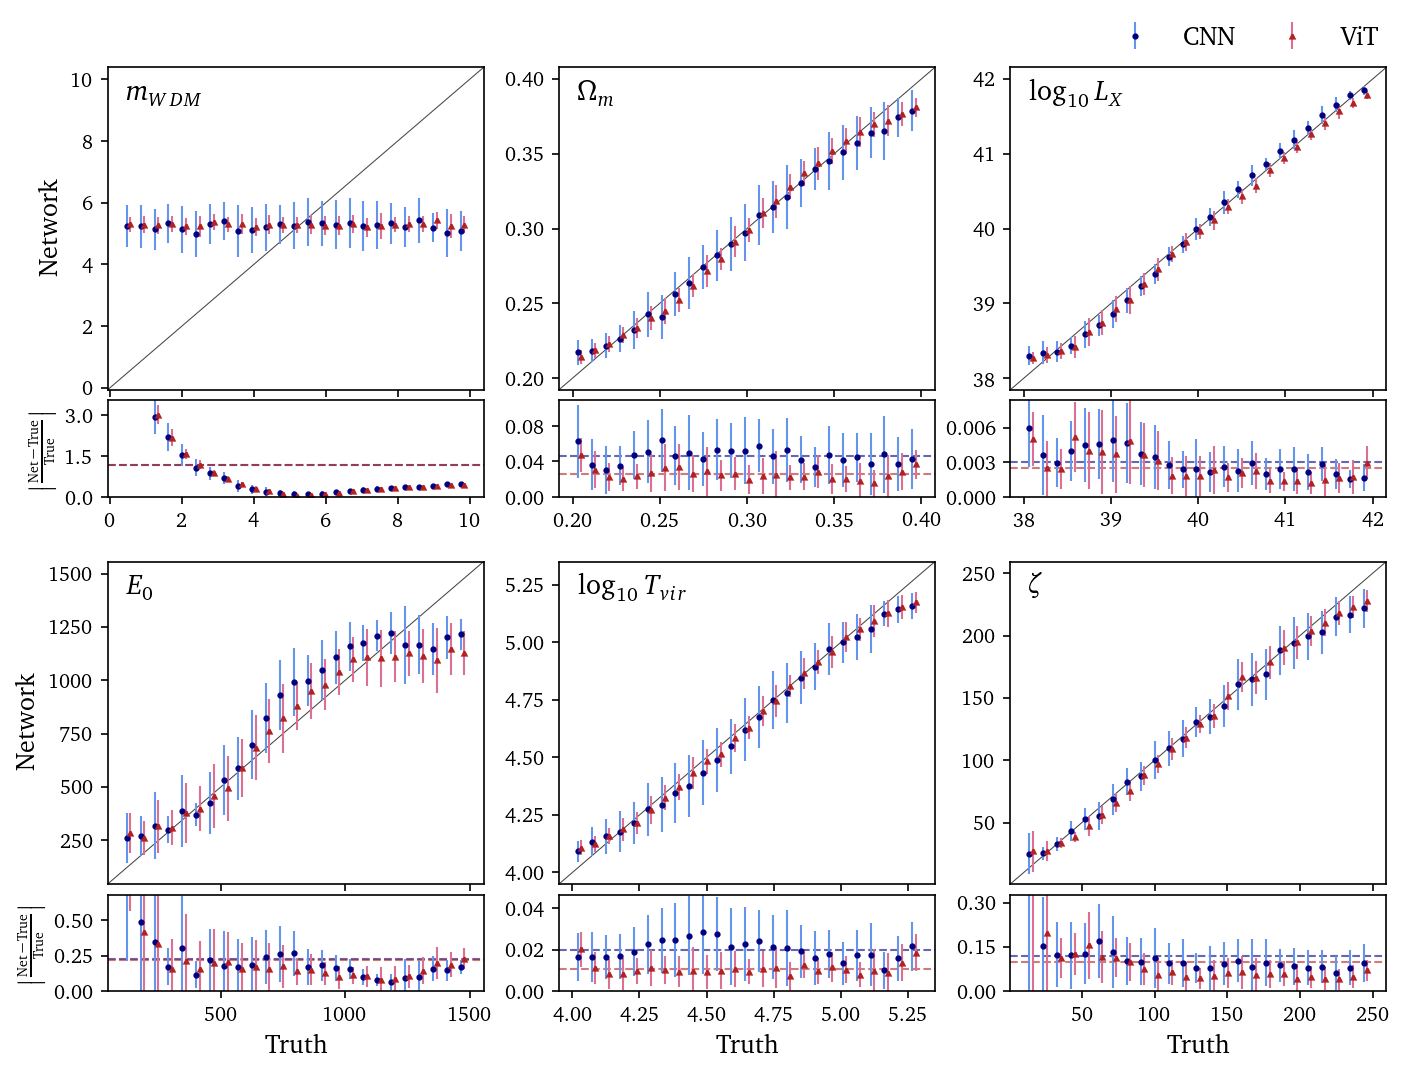

In [36]:
PARAM_NAMES = [r'$m_{WDM}$', r'$\Omega_m$', r'$\log_{10}L_X$', r'$E_0$', r'$\log_{10}T_{vir}$', r'$\zeta$']
fig = compare_models(
    dir1='/remote/gpu02/ore/skatr/runs/regression_mini_CNN/2024-07-02_14-22-43', # cnn x2new scratch
    dir2='/remote/gpu02/ore/skatr/runs/regression_mini_ViT/2024-07-01_23-28-45', # vit x2new scratch
    name1='CNN',
    name2='ViT'
)
fig.savefig('cnn_vs_vit.pdf', bbox_inches='tight')
plt.show()

#### Pretrain vs scratch in domain

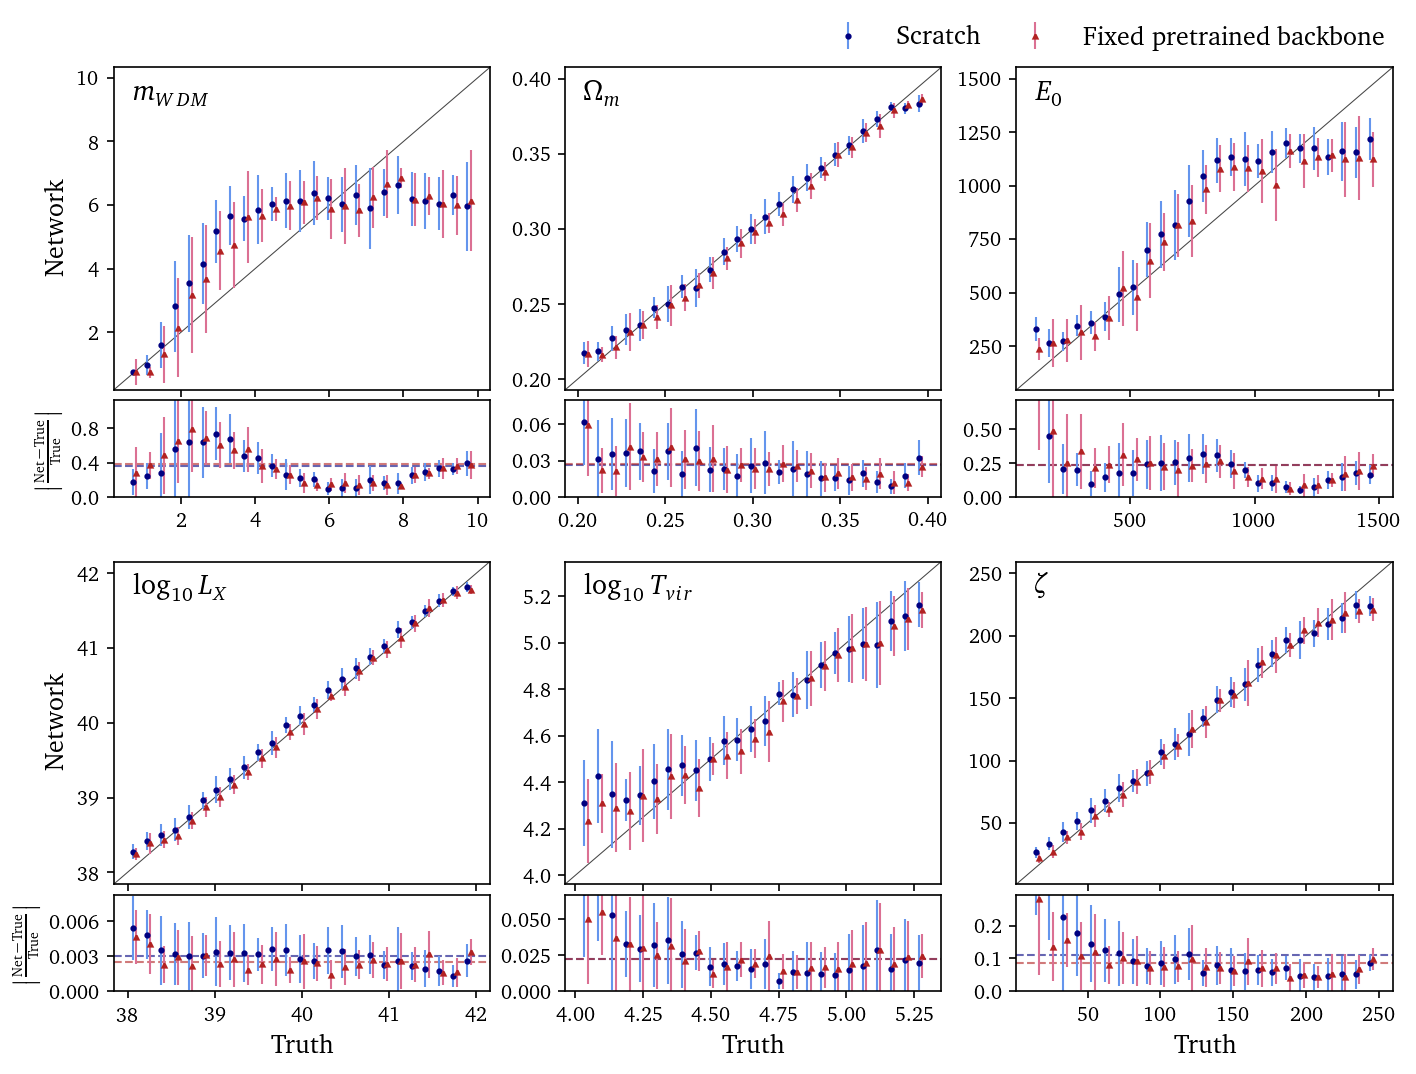

In [37]:
PARAM_NAMES = [
    r'$m_{WDM}$', r'$\Omega_m$', r'$E_0$', r'$\log_{10}L_X$', r'$\log_{10}T_{vir}$', r'$\zeta$'
]
fig = compare_models(
    dir1='/remote/gpu02/ore/skatr/runs/regression_micro_ViT/2024-07-03_17-33-35', # x5old scratch
    dir2='/remote/gpu02/ore/skatr/runs/fine_regression_micro_MLP/2024-07-03_17-41-47', # x5old jepa+finetune
    name1='Scratch',
    name2='Fixed foundation backbone'
)
fig.savefig('scratch_vs_foundation.pdf', bbox_inches='tight')
plt.show()

#### Pretrain new vs pretrain old

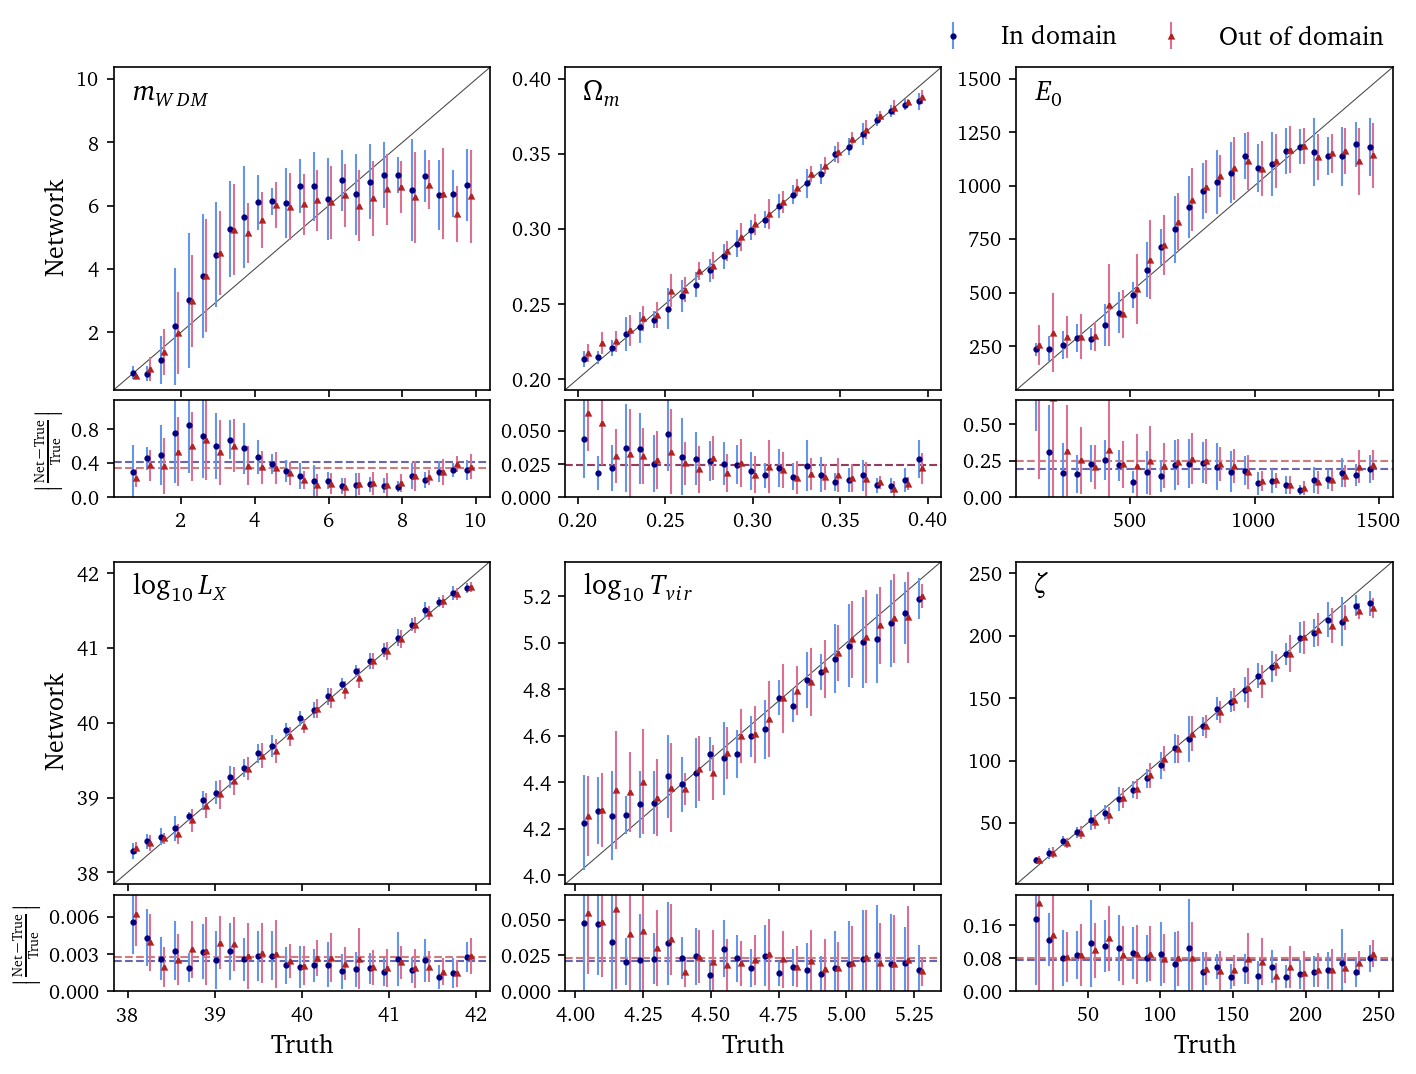

In [38]:
PARAM_NAMES = [
    r'$m_{WDM}$', r'$\Omega_m$', r'$E_0$', r'$\log_{10}L_X$', r'$\log_{10}T_{vir}$', r'$\zeta$'
]
fig = compare_models(
    dir1='/remote/gpu02/ore/skatr/runs/fine_regression_micro_MLP/2024-07-05_11-53-15', # x5old jepa+finetune
    dir2='/remote/gpu02/ore/skatr/runs/fine_regression_micro_MLP/2024-07-10_10-04-57', # x5new jepa+finetune
    name1='In domain',
    name2='Out of domain'
)
fig.savefig('domain_shift.pdf', bbox_inches='tight')
plt.show()

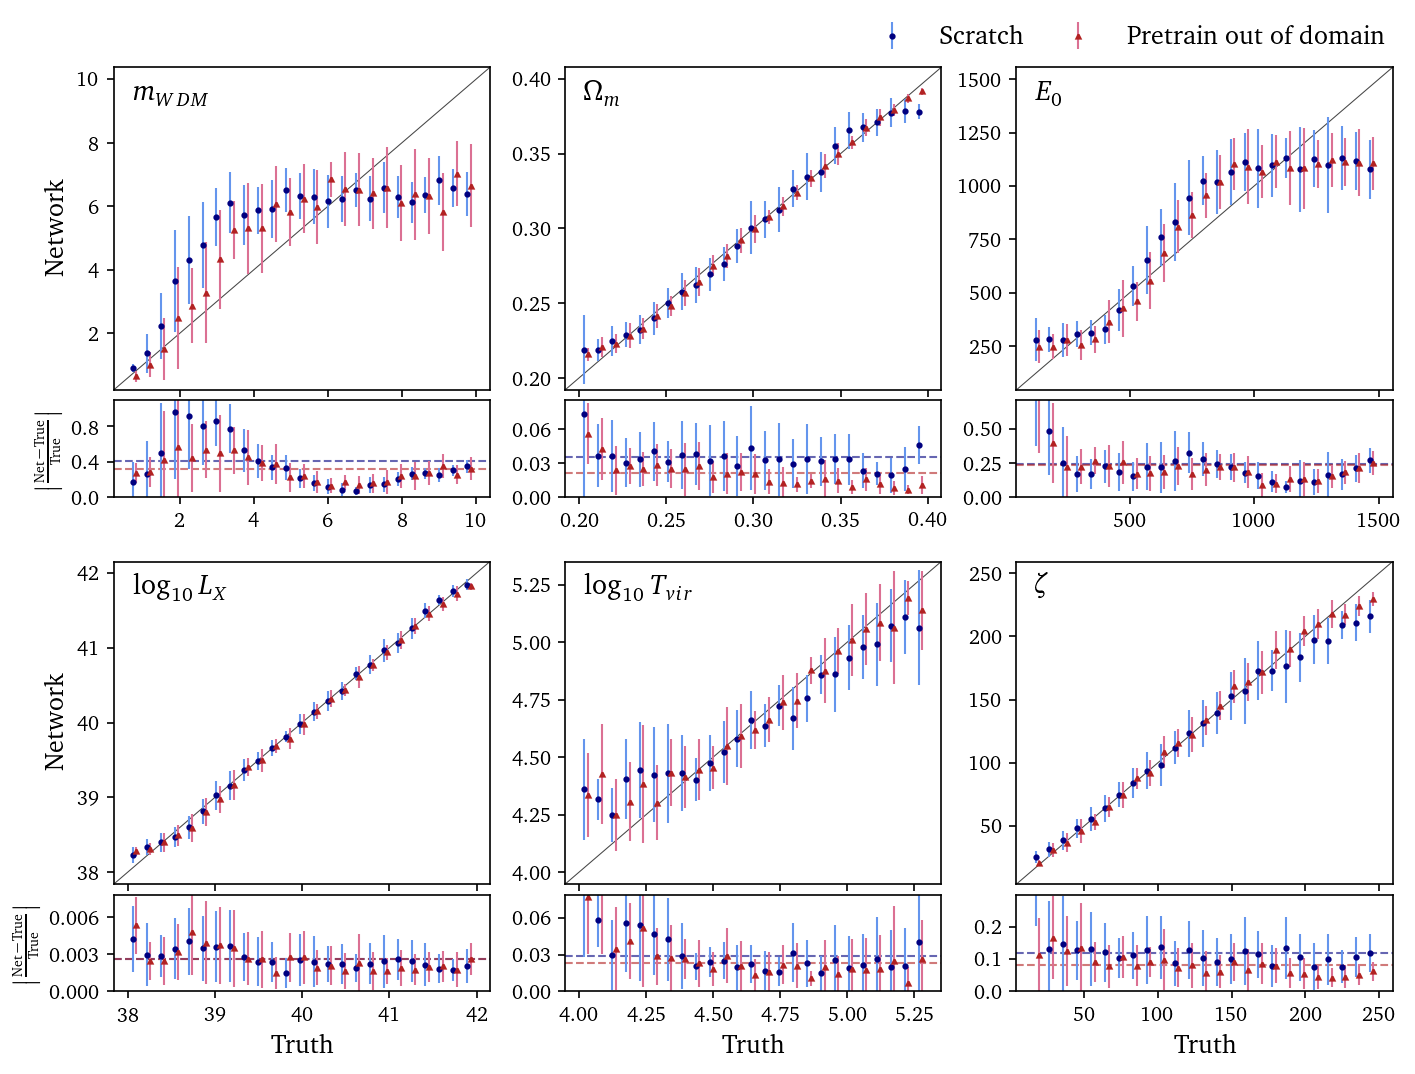

In [3]:
PARAM_NAMES = [
    r'$m_{WDM}$', r'$\Omega_m$', r'$E_0$', r'$\log_{10}L_X$', r'$\log_{10}T_{vir}$', r'$\zeta$'
]
fig = compare_models(
    dir1='/remote/gpu02/ore/skatr/runs/regression_micro_ViT_opt/2024-07-15_09-54-33/best', # x5opt sratch
    dir2='/remote/gpu02/ore/skatr/runs/fine_regression_micro_MLP/2024-07-12_10-23-27', # x5new jepa + x5opt finetune
    name1='Scratch',
    name2='Pretrain out of domain'
)
plt.show()
fig.savefig('domain_shift_opt.pdf', bbox_inches='tight')

## Parameter posteriors

In [ ]:
import getdist
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from getdist import plots, MCSamples
from itertools import combinations
from matplotlib.backends.backend_pdf import PdfPages

In [ ]:
path1 ='/remote/gpu02/ore/skatr/runs/inference_micro/2024-07-12_16-07-43/'
path2 ='/remote/gpu02/ore/skatr/runs/inference_micro/2024-07-12_16-09-15/'

metrics_file = 'param_posterior_pairs.npz'    
record1 = np.load(path1+metrics_file)
record2 = np.load(path2+metrics_file)

params1 = record1['params']
params2 = record2['params']

samples1 = record1['samples']
samples2 = record2['samples']

print(record1['param_logprobs'].mean())
print(record2['param_logprobs'].mean())

11.637833
12.317899


In [ ]:
labels = [r'$m_{WDM}$', r'$\Omega_m$', r'$E_0$', r'$\log_{10}L_X$', r'$\log_{10}T_{vir}$', r'$\zeta$']
import random

N = len(samples1)
with PdfPages('comparison_traingle.pdf') as pdf:
    
    for j in random.sample(range(N), min(N, 8)):
        post1 = MCSamples(
            samples=samples1[j],
            names=labels,
            labels=[l.replace('$', '') for l in labels]
        )
        post2 = MCSamples(
            samples=samples2[j],
            names=labels,
            labels=[l.replace('$', '') for l in labels]
        )         
        g = plots.get_subplot_plotter()
        g.settings.legend_fontsize = 18
        g.settings.axes_fontsize=18
        g.settings.axes_labelsize=18
        g.settings.linewidth=2
        g.settings.line_labels=False
        colour=['C0', 'C3']
        g.triangle_plot(
            [post1, post2], filled=True, legend_loc='upper right', colors=colour, contour_colors=colour
        )
        # add truth to 1d and 2d marginals
        for i in range(6):
            ax = g.subplots[i,i].axes
            ax.axvline(params1[j,i], color='k', ls='--',lw=2)
        for n, m in combinations(range(6), 2):
            ax = g.subplots[m,n].axes
            ax.scatter(params1[j,n],params1[j,m],color='k',marker='x',s=100)
        
        fig = g.fig
        patch1 = mpatches.Patch(color=colour[0], label='Scratch')
        patch2 = mpatches.Patch(color=colour[1], label='Pretrain')
        true_line = mlines.Line2D([], [], color='k', marker='x',ls='--',lw=2,
                              markersize=10, label='True')
        fig.legend(handles=[patch1,patch2,true_line],bbox_to_anchor=(0.66, 0.62),fontsize=14, frameon=False)
        
        pdf.savefig(fig)
        plt.close()

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


## Posterior Calibration 

In [ ]:
# path = '/remote/gpu02/ore/skatr/runs/inference_micro/2024-06-15_00-15-07' # weird case
# path = '/remote/gpu02/ore/skatr/runs/inference_micro/2024-06-16_21-33-05' # uniform (also weird)
# path = '/remote/gpu02/ore/skatr/runs/inference_micro/2024-06-18_16-56-01'
# path = '/remote/gpu02/ore/skatr/runs/inference_micro/2024-06-19_23-12-14'
# path = '/remote/gpu02/ore/skatr/runs/inference_micro/2024-06-20_00-38-19'

# path = '/remote/gpu02/ore/skatr/runs/inference_micro/2024-06-17_22-40-33/' # random
# path = '/remote/gpu02/ore/skatr/runs/inference_micro/2024-07-09_09-22-45' # jepa

# path = '/remote/gpu02/ore/skatr/runs/inference_micro/2024-07-12_16-07-43' # scratch
path = '/remote/gpu02/ore/skatr/runs/inference_micro/2024-07-12_16-09-15' # jepa

record = np.load(path + '/param_posterior_pairs.npz')

In [ ]:
# TARP calibration

def dist(v1, v2):
    return np.sqrt(((v1-v2)**2).sum(axis=-1))
    
params  = record['params'] 
samples = record['samples']
test_logprobs = record['param_logprobs']
posterior_logprobs = record['sample_logprobs']

fs = [ (t > p.squeeze()).mean() for t, p in zip(test_logprobs, posterior_logprobs) ]

mins, maxs = params.min(0), params.max(0)
ref_params = np.random.rand(*params.shape) * (maxs-mins) + mins
tarps = [
    (dist(t,r) > dist(p,r)).mean() for r, t, p in zip(ref_params, params, samples)
]

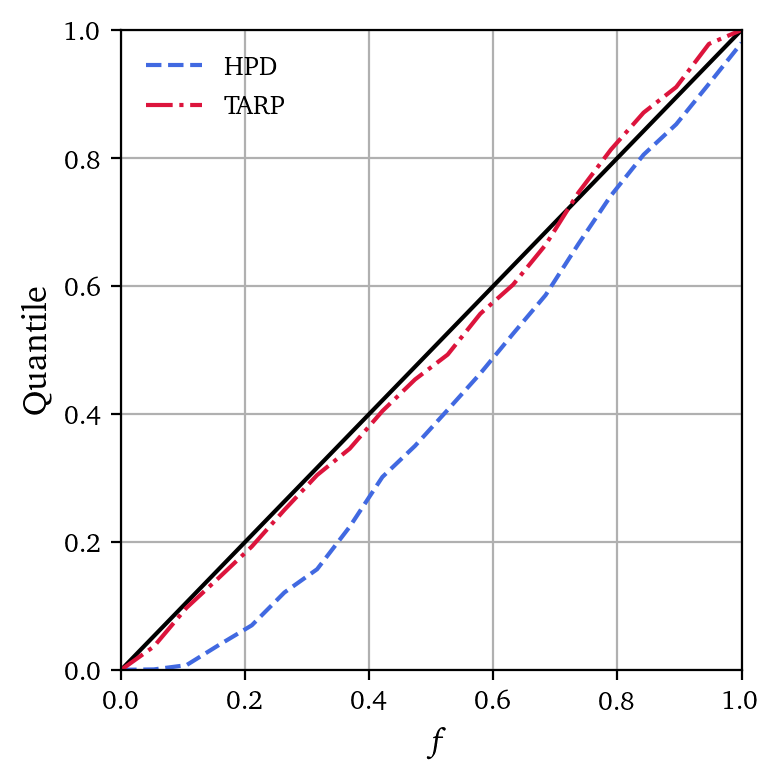

In [ ]:
bins = np.linspace(0, 1, 20)
f_quantiles = np.quantile(fs, bins)
tarp_quantiles = np.quantile(tarps, bins)

fig, ax = plt.subplots(figsize=(4,4), dpi=200)
ax.plot([0,1], [0,1], ls='-', color='k')
ax.plot(bins, f_quantiles, color='royalblue', ls='--', label='HPD')
ax.plot(bins, tarp_quantiles, color='crimson', ls='-.', label='TARP')
ax.set_ylabel(r'Quantile', fontsize=13)
ax.set_xlabel('$f$', fontsize=13)
ax.legend(frameon=False)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.grid()
fig.tight_layout()
plt.show()